In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('cleanedData.csv')
df.head(5)

,City_A,City_Abbeville,City_Akron,City_Alameda,City_Albany,City_Albuquerque,City_Aldie,City_Aledo,City_Alhambra,City_Allen Park,...,Immune_chronicmonoorepstein-barrvirus,Immune_frequentherpesoutbreaks,Immune_viralinfectionsbecomebacterial,Immune_increasedsusceptibilitytocancer,Reproductive_changesinmenstrualcycle,Reproductive_inconsistentmenstrualcycle,Reproductive_vaginalyeastorbacterialinfections,Reproductive_jockitch,Reproductive_infertilityinbothgenders,Reproductive_hormoneimbalances
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,1,1,1,1,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,1,1,0,0,0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


Principal Component Analysis(PCA) to reduce the 145 columns

In [56]:
#Inital Shape
df.shape

(553, 628)

In [57]:
#Extracting Symptom columns for Model
brain_symptomDF = df.filter(like='Brain')
brain_symptomDF

,Brain_brainfog,Brain_memoryloss,Brain_anger/aggressiveness,Brain_confusion,Brain_troublefindingtherightword
0,1,0,0,0,0
1,1,1,1,0,0
2,1,1,1,1,1
3,0,0,0,0,0
4,1,0,1,0,1
...,...,...,...,...,...
548,0,0,0,0,0
549,1,0,0,0,0
550,0,0,0,0,0
551,0,0,0,0,0


In [58]:
# Extracting location and mold columns for PCA analysis
location_moldDF = df.loc[:,'City_A':'Rhizopus stolonifer']
print(location_moldDF.shape)
#location_moldDF.columns

(553, 522)


In [59]:
# Just mold
moldDF = df.loc[:,'Aspergillus flavus/oryzae':'Rhizopus stolonifer']
print(moldDF.shape)
#moldDF.columns

(553, 36)


1. Standardaization

In [60]:
# Standardizing the data
scaler = StandardScaler()
data_std = scaler.fit_transform(location_moldDF)


2. Apply PCA

In [61]:
from sklearn.decomposition import PCA

# Choosing the number of components for PCA
pca = PCA(n_components=75)  # Retains 90% of the variance
X_pca = pca.fit_transform(data_std)

# Check how many components were selected
print("Number of components chosen:", pca.n_components_)

Number of components chosen: 75


says i need 25 components to capture 90% of the data

In [62]:

locationmoldDF_PCA = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(pca.n_components_)])


3. Examine and Visualize

Scree Plot

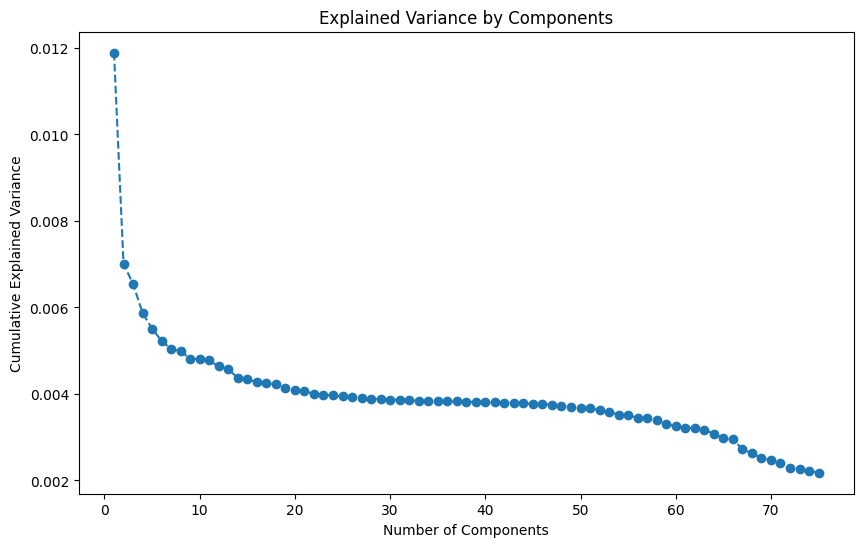

In [63]:
import matplotlib.pyplot as plt

explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(10, 6))
plt.plot(range(1,  pca.n_components_+1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


Cumulative Explained Variance Plot

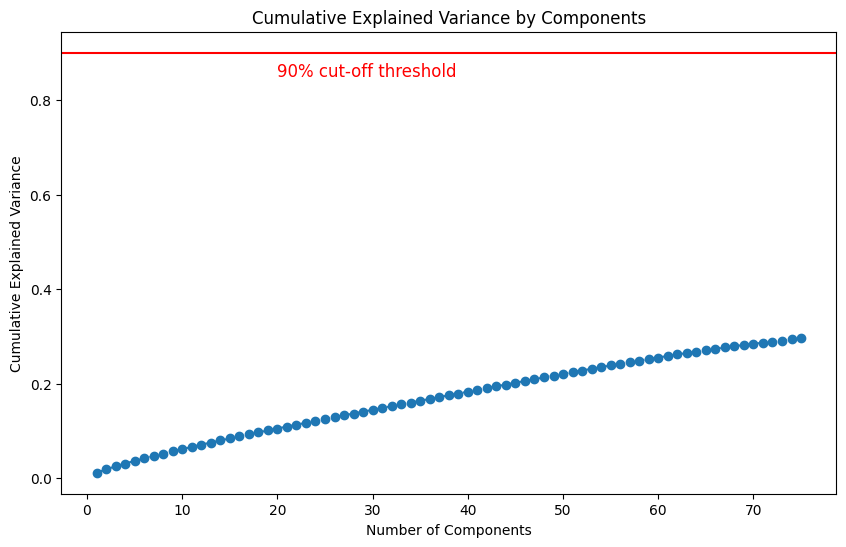

In [64]:
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='-')  # Line at 90% variance
plt.text(20, 0.85, '90% cut-off threshold', color = 'red', fontsize=12)
plt.show()
